In [65]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [66]:
# %matplotlib notebook
%matplotlib inline

In [67]:
import os
print(os.listdir("../Resources"))

['Strain_Dataframe.csv', 'Strain_Frame.csv', 'Strain_Frame_Energy.csv', 'Strain_Frame_HighValues.csv']


In [88]:
strain_data = pd.read_csv('../Resources/Strain_Frame_Energy.csv')
strain_data.sample(20)
# x = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, 1].values

,Energetic,Relax,StrainType
1735,4,1,1
2103,1,2,3
2073,3,2,1
1210,2,3,2
1768,2,2,3
61,2,3,1
311,3,2,3
199,2,3,2
1882,4,1,1
1543,1,4,1


In [89]:
# # Feature Engineering (One hot encoding)
# strain_data =pd.get_dummies(strain_data, drop_first=True)

# strain_data.sample(20)

In [90]:
# Test Train Spilt
X_train, X_test, y_train, y_test = train_test_split(strain_data.drop('StrainType', axis=1), strain_data['StrainType'])

In [91]:
# Train the model using the training data
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X_train, y_train)

LogisticRegression()

In [93]:
# Predicting if a class-1 child-age girl survived
LogReg.predict(np.array([[0,1]]))[0]

3

### Read the csv file into a pandas DataFrame

# Cleaning and Preprocessing Data for Machine Learning

Preprocessing your data is the process of preparing your data to be analyzed. As you can imagine, there is no "correct" way to do this. The approach taken for this depends on the data and the type of analysis. In this notebook, we'll look at encoding categorical variables, scaling, and normalizing.

**Dataset:**  Strain_Frame.csv

**Source:** cannabis.net

**Description:** Types of cannabis strains

Variables/Columns
- **TYPES:** Types  \[*Hybrid* or *Indica*\]
- **RATING** Rating  \[*1* or *2* or *3*\]
- **EFFECTS:** Effects
- **WEIGHT:** Brain weight (grams)



In [95]:
Strain_Frame = pd.read_csv('../Resources/Strain_Frame.csv')
print("Strain_Frame:",Strain_Frame.shape)
Strain_Frame.head()


Strain_Frame: (2351, 186)


,Strain,Rating,StrainType,Type: Hybrid,Type: Indica,Type: Sativa,Effect: Creative,Effect: Energetic,Effect: Tingly,Effect: Euphoric,...,Descriptor: Potent,Descriptor: Body High,Descriptor: Head High,Descriptor: Daytime,Descriptor: Nighttime,Descriptor: Outside,Descriptor: Creative,Descriptor: Psychedelic,Descriptor: Lazy,Descriptor: Calm
0,100 Og,4.0,3,1,0,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,98 White Widow,4.7,3,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1024,4.4,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13 Dawgs,4.2,3,1,0,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,0
4,24K Gold,4.6,3,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


### Split data and labels and reshape

In [104]:
X = Strain_Frame[["Effect: Creative", "Effect: Energetic", "Effect: Tingly", "Effect: Euphoric", "Effect: Relaxed", "Effect: Aroused", "Effect: Happy", "Effect: Uplifted", "Effect: Hungry", "Effect: Talkative", "Effect: Sleepy","Effect: Focused","Medical: Pain", "Medical: Insomnia", "Medical: Nausea", "Medical: Seizure", "Medical: Anxiety", "Medical: Muscle Spasms", "Medical: Appetite", "Medical: Stress", "Medical: Depression", "Medical: Crohn's Disease", "Medical: Substance Abuse", "Medical: PTSD", "Medical: Arthritis", "Medical: Fatigue"]]
y = Strain_Frame["Rating"].values.reshape(-1, 1)
print("var: (row,col)")
print("X.shape",X.shape)
print("y.shape",y.shape)

var: (row,col)
X.shape (2351, 26)
y.shape (2351, 1)


## Scaling and Normalization

In [105]:
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train: ", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train: ", y_train.shape)
print("Y_test:", y_test.shape)

print("X_train:",X_train.columns)

X_train:  (1763, 26)
X_test: (588, 26)
Y_train:  (1763, 1)
Y_test: (588, 1)
X_train: Index(['Effect: Creative', 'Effect: Energetic', 'Effect: Tingly',
       'Effect: Euphoric', 'Effect: Relaxed', 'Effect: Aroused',
       'Effect: Happy', 'Effect: Uplifted', 'Effect: Hungry',
       'Effect: Talkative', 'Effect: Sleepy', 'Effect: Focused',
       'Medical: Pain', 'Medical: Insomnia', 'Medical: Nausea',
       'Medical: Seizure', 'Medical: Anxiety', 'Medical: Muscle Spasms',
       'Medical: Appetite', 'Medical: Stress', 'Medical: Depression',
       'Medical: Crohn's Disease', 'Medical: Substance Abuse', 'Medical: PTSD',
       'Medical: Arthritis', 'Medical: Fatigue'],
      dtype='object')


### StandardScaler

### Fit the training data to the StandardScaler

In [106]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
print("X_scaler",X_scaler)
y_scaler = StandardScaler().fit(y_train)
print("y_scaler",y_scaler)

X_scaler StandardScaler()
y_scaler StandardScaler()


### Create variables to hold the scaled train & test data

In [107]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print("X_train_scaled",X_train_scaled)
print("X_test_scaled",X_scaler)
print("y_train_scaled",y_train_scaled)
print("y_test_scaled",y_scaler)

X_train_scaled [[ 1.45614353 -0.61165607 -0.41685526 ... -0.07552818 -0.06751596
  -0.15040548]
 [-0.68674549 -0.61165607  2.39891419 ... -0.07552818 -0.06751596
  -0.15040548]
 [-0.68674549  1.63490571 -0.41685526 ... -0.07552818 -0.06751596
  -0.15040548]
 ...
 [-0.68674549 -0.61165607 -0.41685526 ... -0.07552818 -0.06751596
   6.64869372]
 [ 1.45614353  1.63490571 -0.41685526 ... -0.07552818 -0.06751596
  -0.15040548]
 [-0.68674549 -0.61165607  2.39891419 ... -0.07552818 -0.06751596
  -0.15040548]]
X_test_scaled StandardScaler()
y_train_scaled [[ 0.58972399]
 [-5.19097828]
 [ 0.34886139]
 ...
 [ 0.58972399]
 [ 0.1079988 ]
 [-0.37372639]]
y_test_scaled StandardScaler()


### Plot the scaled data

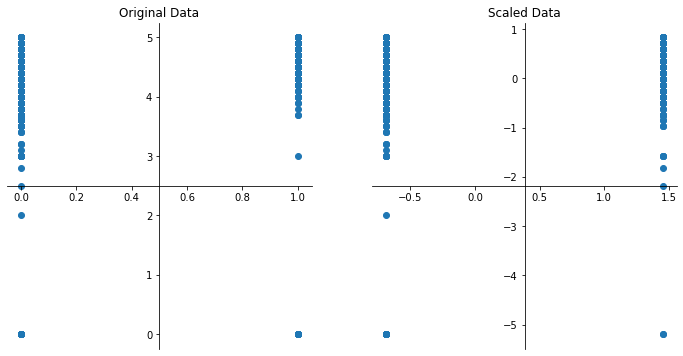

In [108]:
# Create your subplots
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

# Add title labels
axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

# Using your max x & y values, set the plot axis limits for your 
#maxx = X_train.max()
#maxy = y_train.max()
#axes1.set_xlim(-maxx - 100, maxx + 100)
#axes1.set_ylim(-maxy - 100, maxy + 100)

# Set limits for your scaled data
#axes2.set_xlim(-3, 3)
#axes2.set_ylim(-3, 3)

# Use a function to apply plot formatting, to avoid having to write it out twice
def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
# apply formatting function to each axis
set_axes(axes1)
set_axes(axes2)

# plot the original data and the scaled data
axes1.scatter(X_train["Medical: Anxiety"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

# Put it all together

In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
print(model.score(X_test_scaled, y_test_scaled))

0.37139627492698435


### Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [113]:
# X = pd.get_dummies(brain[["size", "gender", "age"]])
# y = ["weight"].values.reshape(-1, 1)
# X.head()

### Step 2) Split data into training and testing data

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [115]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

In [116]:
# Generate the model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

### Step 5) Plot the residuals

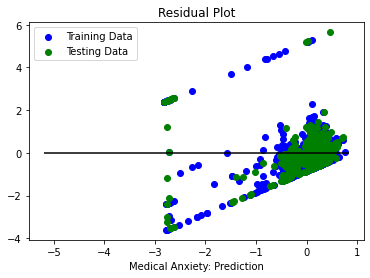

In [121]:
# create a residuals plot using the predictions for both test and train data
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()

# create a horizontal line at y=0 to show how much error is in each prediction
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.xlabel("Medical Anxiety: Prediction")
plt.show()

### Step 6) Quantify your model using the scaled data

In [119]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6642463770893163, R2: 0.37139627492698435
